<img src='http://drive.google.com/uc?export=view&id=1UAsSD6z0wK4UJjjzBhDEIlSZnELLmeeb'>

# <font color='lightblue'>Answering Questions</font>

In this project you will use all you learnt about in the class to answer a question. Imagine you are part of a team and you have been assigned a question to answer, build a notebook that you would be able to share with your team that shows what you found. 

In this project you will:

1.  Introduce your question of interest
2.  Make sure your reader knows enough about the data
3.  Wrangle and preprocess your data so that a team mate can reproduce your work
4.  Build and test a model that can provide insight into your question
5.  Interpret your model results
6.  Answer your question



Note: Marks will be awarded for clarity, organization, and succinctness. I.e., try to point out only the important parts in a well-organized easy to follow manner. (Marks: 3)

## <font color='lightblue'>1. Ask a question </font>

**Q1**: Layout your question of interest. Remember to state your question as clearly and simply as you can (Mark 1), and what your ideal outcome would be (Marks 1).

**Q2**: Identify and describe what data sources you'll use (Marks 1). Make sure to talk about one of the following: data accuracy, reliability, validity, or sample selection. (Marks: 1)

**Q3**: Layout what kind of ML problem you are facing and what kind of model you'll use to answer it (eg., is it unsupervised or supervised learning, and is it classification or regression). Make sure to say why. (Marks 1)

In [ ]:
# Q1
#
# The background for this data analysis will be from the viewpoint of some
# company that would like to sell their oler/used vehicles. Becuase they have so
# many, it would be helpful to have a faster way of placing a price tag on each
# vehicle. What they want to know is: "Given information about the vehicle, 
# (Odometer reading, year made, color painted, etc.) can we estimate an accurate
# market price."
#
# Ideally this model would be able to give a fair estimate for a vehicle based
# on other market listings.

# Q2
#
# I decided to use a dataset I found on kaggle that contained all current listings
# on craigslist for vehicles across the United States. This is a very large
# dataset, and required some extra processing outside of this notebook. (1.4GB),
# ~500000 entries.
#
# The size of the data is quite good, but can we trust this data? That is a more
# complicated question. Becuase anyone can list their vehicle for any price,
# each data point is based on one idividual perspective. And there will be no way
# to know if a price is wildy over or under valued. I would expect to see a lot
# of over valuations, because vehicles priced below market value would sell faster
# than those that are priced over market value. We dont get data points on
# vehicles that have been sold, only the ones that remain for sale.

# Q3
#
# I have chosen to use a linear regression for this challenge becuase the value
# I am interested in predicting is just a single continuous number. There is no
# classification is this example. This is a form of supervised learning.

## <font color='lightblue'>2. Data understanding, exploration, and visualization </font>

**Action**: While above you gave an overview of the dataset(s) that will be used, here make sure that the reader understands the important details of the data. E.g., show a figure or descriptive statistic and explain why the reader should know about this, i.e., how will it help your reader understand your analysis? (Marks: 2)

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import cool library for location plotting
#!apt install proj-bin libproj-dev libgeos-dev
from mpl_toolkits.basemap import Basemap

In [ ]:
# Other preprocessing:
#
# The original dataset contained over 1.4GB of data from craigslist. The issue is
# that Colab seems to have a memory limit. Trying to load this dataset from file
# would first take 1hr+ of time, but would then crash the page before completely
# loading. I did some work with the csv in an external python environment and
# determined that each entry contained the entire craigslist description within
# it. This could be paragraphs of text for every single entry! So I dropped that
# column and exported the modified data to another csv. The file size is now around
# 90MB, and can load in approx 3m.

# Read csv
df_raw = pd.read_csv('/content/cars.csv')

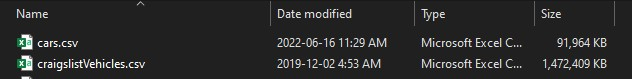

In [ ]:
# Dataframe helper function
def dataHelper(df):
  print("=========== SHAPE ================")
  print(df.shape)
  print("=========== DATA TYPES ===========")
  print(df.dtypes)
  print("=========== NULL VALUES ==========")
  print(df.isna().sum())

# Stats of raw data
dataHelper(df_raw)

=========== SHAPE ================
(525839, 18)
=========== DATA TYPES ===========
city             object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
image_url        object
lat             float64
long            float64
dtype: object
=========== NULL VALUES ==========
city                 0
price                0
year              1440
manufacturer     24579
make              8638
condition       245958
cylinders       210400
fuel              4295
odometer         98591
title_status      2825
transmission      4267
drive           151364
size            351320
type            148933
paint_color     171533
image_url            8
lat              12221
long             12221
dtype: int64


In [ ]:
# Lets drop any rows with null values. We have over 500k datapoints, so I dont
# think we will suffer from a smaller set
df_cars = df_raw.dropna(how='any')
dataHelper(df_cars)

=========== SHAPE ================
(107748, 18)
=========== DATA TYPES ===========
city             object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
image_url        object
lat             float64
long            float64
dtype: object
=========== NULL VALUES ==========
city            0
price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
image_url       0
lat             0
long            0
dtype: int64


In [ ]:
# Look at the data
df_cars.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,lat,long
0,"grand rapids, MI",1500,2006.0,cadillac,cts,good,6 cylinders,gas,236000.0,clean,automatic,rwd,mid-size,coupe,blue,https://images.craigslist.org/00K0K_a9CZoZg2U8...,42.6430,-85.2937
7,"grand rapids, MI",7995,2007.0,lexus,es 350,excellent,6 cylinders,gas,146111.0,clean,automatic,fwd,compact,sedan,white,https://images.craigslist.org/00U0U_c2jkvGXgBF...,42.8697,-85.6628
8,"grand rapids, MI",4995,2011.0,hyundai,accent gls,excellent,4 cylinders,gas,115048.0,clean,automatic,fwd,compact,sedan,blue,https://images.craigslist.org/00g0g_eKyhvBldbD...,42.8697,-85.6628
9,"grand rapids, MI",12995,2013.0,toyota,prius three,excellent,4 cylinders,gas,72936.0,clean,automatic,fwd,compact,hatchback,white,https://images.craigslist.org/01111_1QdPAzbOvu...,42.8697,-85.6628
12,"grand rapids, MI",8000,2010.0,audi,a6,good,6 cylinders,gas,150000.0,clean,automatic,4wd,full-size,sedan,grey,https://images.craigslist.org/00i0i_4sSm38nY2o...,42.9104,-85.8276


In [ ]:
# Helper function to print summary statistics for a given field
def SumStats(field):
  meanVal = df_cars[field].mean()
  medianVal = df_cars[field].median()
  modeVal = df_cars[field].mode()
  stdVal = df_cars[field].std()
  minVal = df_cars[field].min()
  maxVal = df_cars[field].max()

  print("============ Field:", field, "============")
  print("mean:", meanVal)
  print("median:", medianVal)
  print("mode:", modeVal[0])
  print("std:", stdVal)
  print("min:", minVal)
  print("max:", maxVal)
  print("")

In [ ]:
# Price
SumStats('price')

# Model Year
SumStats('year')

# Odometer Reading
SumStats('odometer')

============ Field: price ============
mean: 76309.28983368601
median: 7995.0
mode: 0
std: 12983845.482965745
min: 0
max: 3009548743

============ Field: year ============
mean: 2008.721618962765
median: 2010.0
mode: 2012.0
std: 7.908986117728646
min: 1900.0
max: 2020.0

============ Field: odometer ============
mean: 116605.0207335635
median: 110397.5
mode: 0.0
std: 131476.2479341417
min: 0.0
max: 10000000.0



In [ ]:
# Some cars obviously priced way too high. For example, the max price value we
# see is over 3 billion dollars! I dont think we are interested in anything that
# could cost that much money, so we will cap our price at 100k.
df_cars = df_cars[df_cars['price'] > 1000]
df_cars = df_cars[df_cars['price'] < 100000]

# Lets also filter out cars older than 1980. This will help us avoid rare cars
# that might have higher prices than expected
df_cars = df_cars[df_cars['year'] > 1980]

# Lets also filter out any vehicles with more than 500,000kms on them. What kind
# of vehicle can drive for 10 million kms?
df_cars = df_cars[df_cars['odometer'] < 500000]

In [ ]:
# Price
SumStats('price')

# Model Year
SumStats('year')

# Odometer Reading
SumStats('odometer')

============ Field: price ============
mean: 11914.964560337343
median: 8950.0
mode: 3500
std: 9766.365433762081
min: 1010
max: 95000

============ Field: year ============
mean: 2009.1054094836495
median: 2010.0
mode: 2011.0
std: 5.972624514509448
min: 1981.0
max: 2020.0

============ Field: odometer ============
mean: 115181.13728347595
median: 113000.0
mode: 150000.0
std: 61056.969851268135
min: 0.0
max: 497000.0



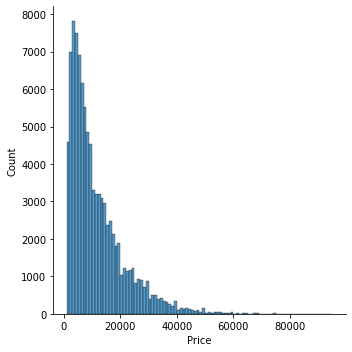

In [ ]:
# Taking a look at the price distribution we can see that most of our used vehicles
# are under 20k. We dont see too many outliers, so our cleaning was successful.

# Distribution Plot
sns.displot(df_cars, x='price', binwidth=1000).set(xlabel='Price')

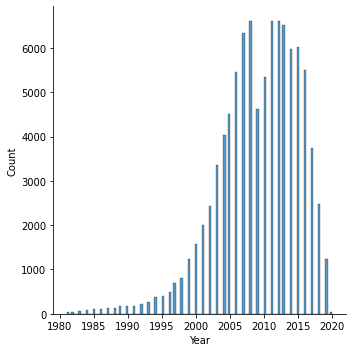

In [ ]:
# Now we can look at the number of vehicles for each year. We expect to have lower
# values at each end of the spectrum, as older vehicles become unuseable, and
# newer vehicles move to the second-hand market.
#
# One intersting observation is a dip around 2008-2009. We could attribute this
# to the economic reccession that occured in that time period. Fewer people would
# be interesting in buying a new vehicle, so production would decrease in a
# similar fashion.

# Distribution Plot
sns.displot(df_cars, x='year').set(xlabel='Year')

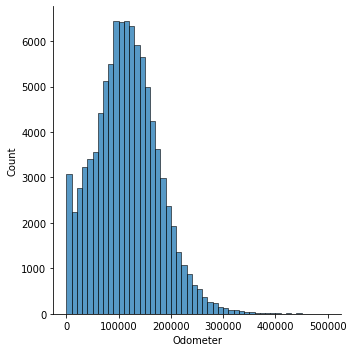

In [ ]:
# Mileage distribution is not very interesting. Lots of values at 0 represent
# new cars.

# Distribution Plot
sns.displot(df_cars, x='odometer', binwidth=10000).set(xlabel='Odometer')

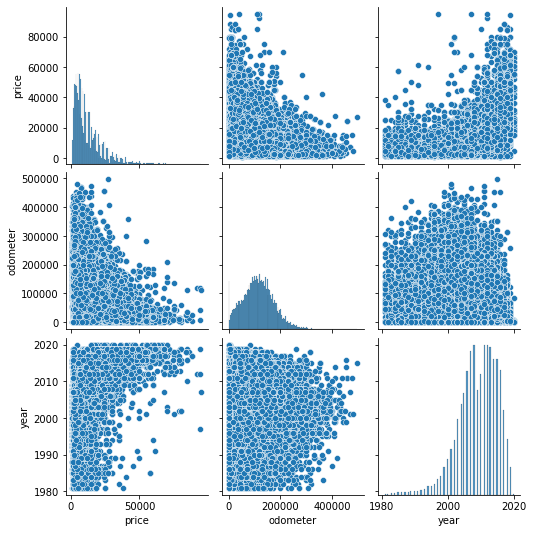

In [ ]:
# Here are some pair plots. We can see the "Market value" in some of these
# relationships in the form of soft edges. i.e. Price-Odometer or Year-Price.

df_cars_pairs = df_cars[["price","odometer","year"]]
sns.pairplot(df_cars_pairs)

[Text(108.125, 0.5, 'Avg. Price'), Text(0.5, 24.662178211767017, 'Model Year')]

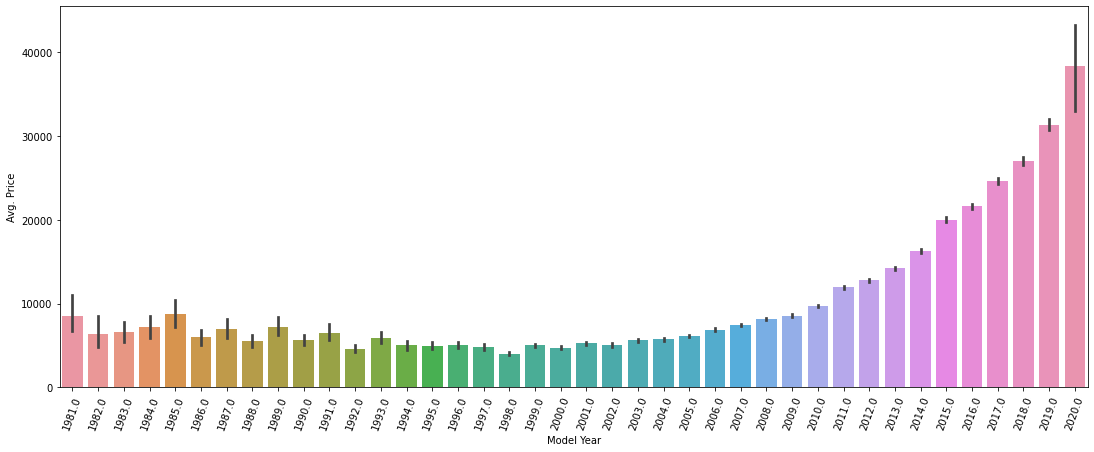

In [ ]:
# Average price per year made. Looks to be fairly flat, with a parabolic curve
# towards the newer end. This might cause us some trouble when we use a linear
# regression

# Categorical Barplot
plt.figure(figsize=(15,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="year", y="price").set(ylabel='Avg. Price', xlabel='Model Year')

[Text(108.125, 0.5, 'Avg. Kms'), Text(0.5, 24.662178211767017, 'Model Year')]

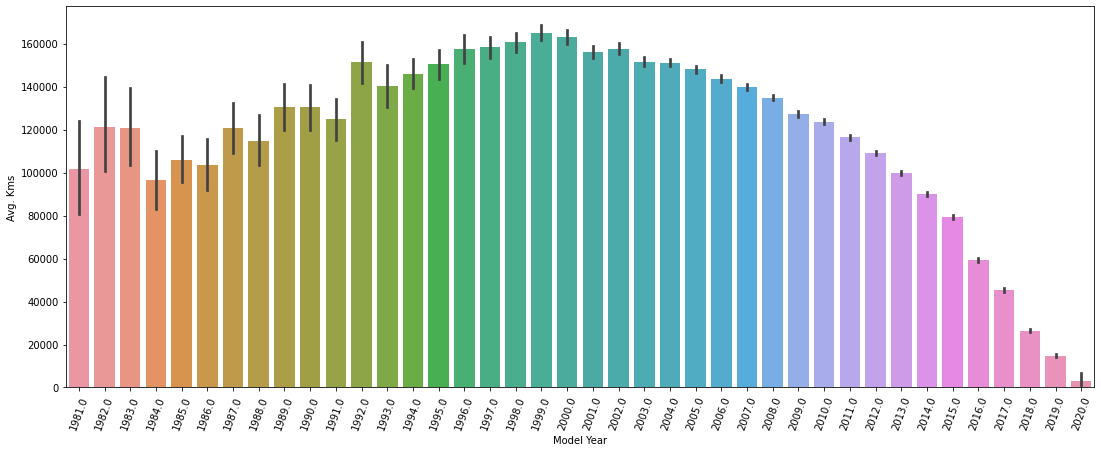

In [ ]:
# Mileage seems to max out around the year 2000, and decrease on either side.
# This is to be expected as we look at newer vehicles, but it might be unexpected
# when we consider older cars. This could be becuase of rarity. We see higher
# std values in this range.

# Categorical Barplot
plt.figure(figsize=(15,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="year", y="odometer").set(ylabel='Avg. Kms', xlabel='Model Year')

[Text(108.125, 0.5, 'Avg. Price'),
 Text(0.5, 24.662178211767017, 'Manufacturer')]

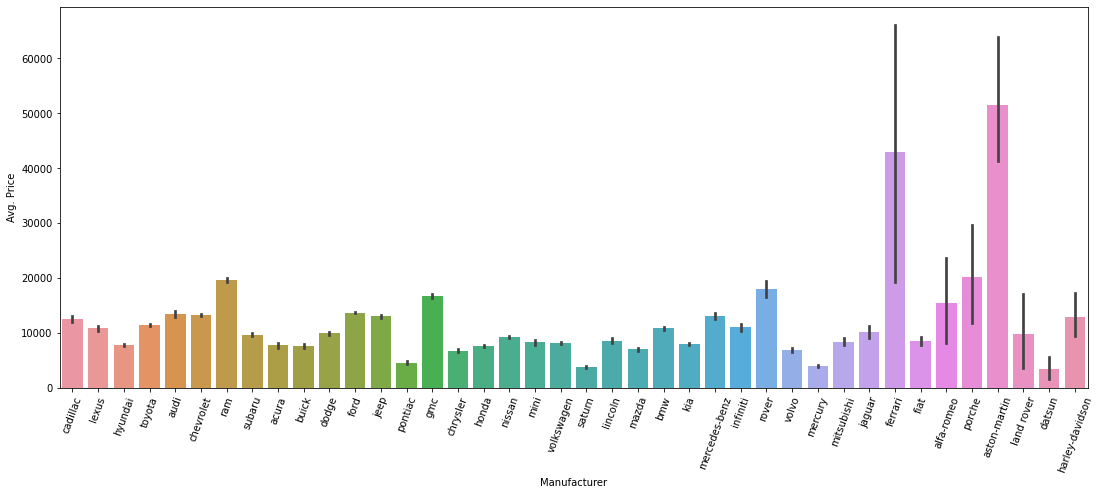

In [ ]:
# Avg. Price for each manufacturer. Most sit around avg. except for a few luxury
# car manufacturers.

# Categorical Barplot
plt.figure(figsize=(15,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="manufacturer", y="price").set(ylabel='Avg. Price', xlabel='Manufacturer')

[Text(63.125, 0.5, 'Avg. Price'),
 Text(0.5, 24.662178211767017, 'Type of Vehicle')]

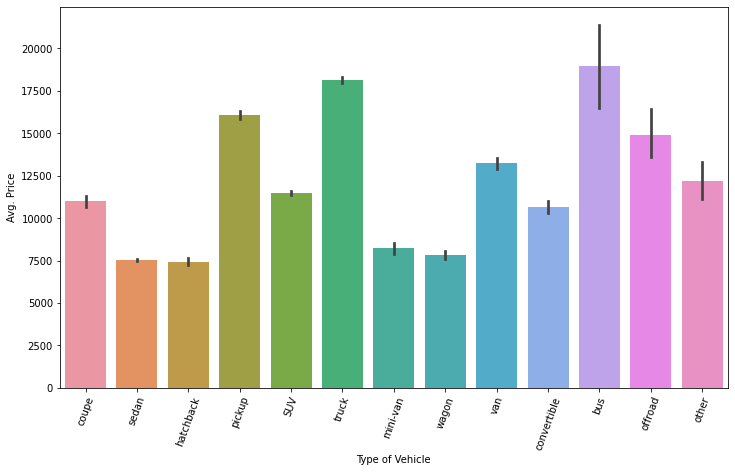

In [ ]:
# Avg. Prices for each type of vehicle. This might be important for our company
# if we had a lot of a certain type of vehicle. (i.e. work trucks)

# Categorical Barplot
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="type", y="price").set(ylabel='Avg. Price', xlabel='Type of Vehicle')

[Text(63.125, 0.5, 'Avg. Price'), Text(0.5, 24.662178211767017, 'Paint Color')]

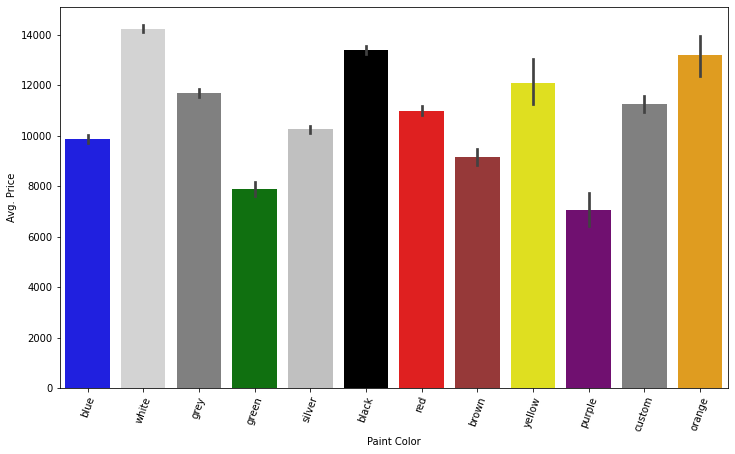

In [ ]:
# Avg. Price based on the color of the vehicle. Looks like green and purple are
# the cheapest in the dataset.

# Categorical Barplot
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
plt.tight_layout()
color = ['blue', 'lightgrey', 'grey', 'green', 'silver', 'black', 'red', 'brown', 'yellow', 'purple', 'grey', 'orange']
sns.barplot(data=df_cars, x="paint_color", y="price", palette=color).set(ylabel='Avg. Price', xlabel='Paint Color')

[Text(63.125, 0.5, 'Avg. Price'), Text(0.5, 24.662178211767017, 'Condition')]

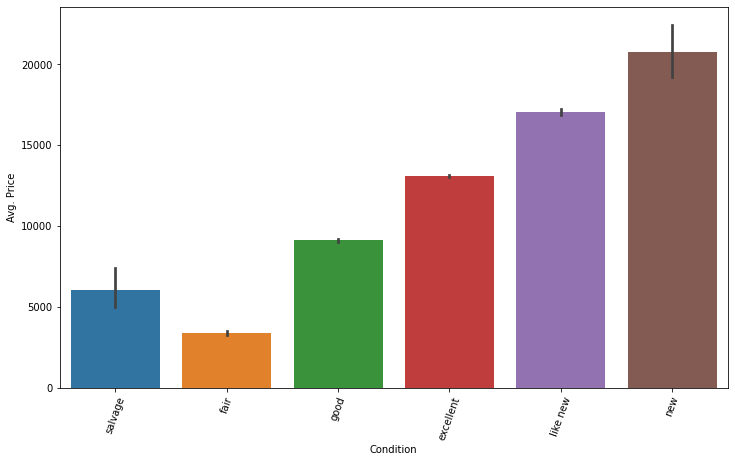

In [ ]:
# Avg. Price for each condition category. Here we see something interesting in
# that cars marked for 'salvage' have a higher price than cars in 'fair'
# condition. This will cause us problems when we ordinally encode this value. We
# would expect this category to be the lowest avg price. This could be due to some
# cars containing rare parts, or maybe listings for salvage lots with multiple
# vehicles.

# Categorical Barplot
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="condition", y="price", order=['salvage', 'fair', 'good', 'excellent', 'like new', 'new']).set(ylabel='Avg. Price', xlabel='Condition')

[Text(63.125, 0.5, 'Avg. Price'), Text(0.5, 24.662178211767017, 'Condition')]

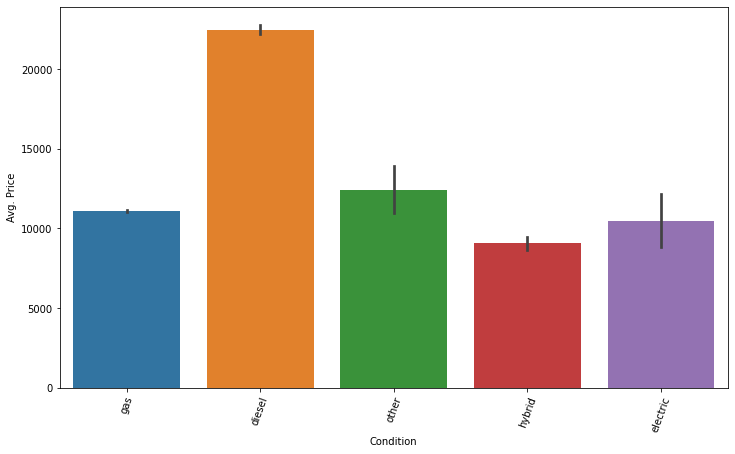

In [ ]:
# Here is the avg. price for each type of fuel the vehicle uses. Diesel vehicles
# appear to be worth more on average.

# Categorical Barplot
plt.figure(figsize=(10,6))
plt.xticks(rotation=70)
plt.tight_layout()
sns.barplot(data=df_cars, x="fuel", y="price").set(ylabel='Avg. Price', xlabel='Condition')

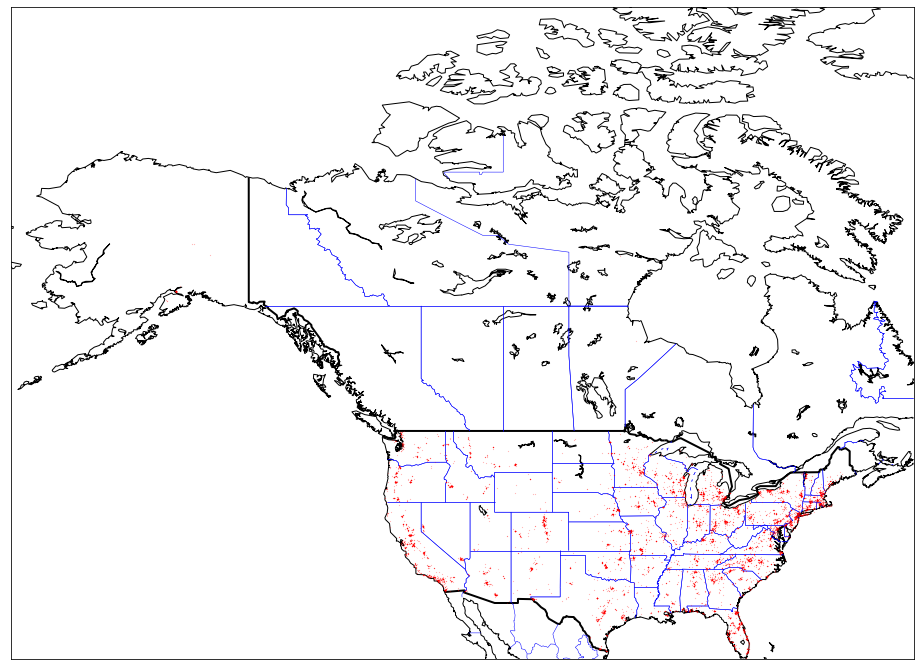

In [ ]:
# Cool code I found online to plot the locations
df_shuffled = df_cars.sample(frac=1)
df_shuffled.head()
plt.figure(figsize=(24,12))
m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -170,
            urcrnrlat = 80,
            urcrnrlon = -60,
            resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
i = 0
for index, row in df_shuffled.iterrows():
    lat = row['lat']
    lon = row['long']
    xpt, ypt = m(lon, lat)
    m.plot(xpt,ypt,'.',markersize=0.2,c="red")
    # stopping criteria
    i = i + 1
    if (i == 10000): break

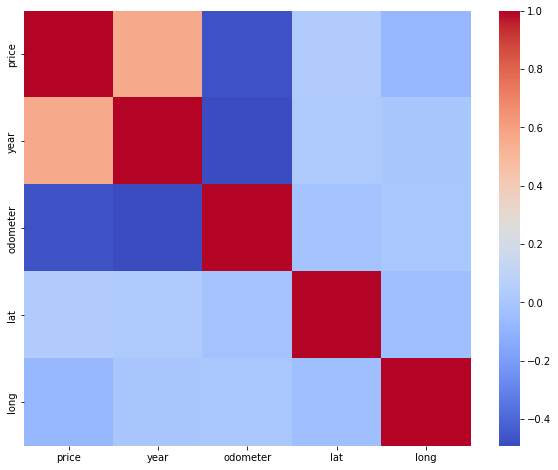

In [ ]:
# We can see a couple of strong correlations in our heatmap. Newer vehicles tend
# to be priced higher (hence the positive relationship), having more kms driven
# negatively impacts the price, and older vehicles tend to have more kms driven.

# Generate Correlation map
correlation = df_cars.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap="coolwarm")

## <font color='lightblue'>3. Data wrangling and preprocessing </font>

**Action**: Layout all your data wrangling and preprocessing steps so that a reader will understand why you took each step, and would be able to reproduce your steps. (Marks: 3)

In [ ]:
# These values either wont be useful, or will be hard to encode, so lets drop them
drop_columns = ['city', 'make', 'image_url', 'transmission', 'title_status']
df_pre = df_cars.copy()
df_pre = df_pre.drop(columns = drop_columns)

In [ ]:
# Ordinally encode condition value
encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], ['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders', 'other']])
df_pre[['condition', 'cylinders']] = encoder.fit_transform(df_pre[['condition', 'cylinders']])

In [ ]:
# Taking a look at the final dataframe
df_pre.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,drive,size,type,paint_color,lat,long
0,1500,2006.0,cadillac,2.0,3.0,gas,236000.0,rwd,mid-size,coupe,blue,42.6430,-85.2937
7,7995,2007.0,lexus,3.0,3.0,gas,146111.0,fwd,compact,sedan,white,42.8697,-85.6628
8,4995,2011.0,hyundai,3.0,1.0,gas,115048.0,fwd,compact,sedan,blue,42.8697,-85.6628
9,12995,2013.0,toyota,3.0,1.0,gas,72936.0,fwd,compact,hatchback,white,42.8697,-85.6628
12,8000,2010.0,audi,2.0,3.0,gas,150000.0,4wd,full-size,sedan,grey,42.9104,-85.8276


In [ ]:
# Split training and testing sets at 20% rate
df_train, df_test = train_test_split(df_pre, test_size=0.20)

In [ ]:
# Scale numerical values
scaler = StandardScaler()
scaling_cols = ['price', 'year', 'odometer', 'lat', 'long']
df_train[scaling_cols] = scaler.fit_transform(df_train[scaling_cols])
df_test[scaling_cols] = scaler.fit_transform(df_test[scaling_cols])

## <font color='lightblue'>4. Build and test a model</font>



**Action:** Use your training dataset to build a model with the goal addressing your question of interest. (Marks: 2)

In [ ]:
# Building, fitting, and predicting with our linear regression model. I chose to
# use all the remaining columns except for lat and long. This might be useful for
# a company with many different locations, but we will just use the average across
# the country to keep things simple.

linear_reg_model = smf.ols(
    formula='price ~ year + C(manufacturer) + condition + cylinders + C(fuel) + odometer + C(drive) + C(type) + C(paint_color)',
    data=df_train
)
linear_reg_results = linear_reg_model.fit()

df_train['price_pred'] = linear_reg_results.predict(df_train)
df_test['price_pred'] = linear_reg_results.predict(df_test)

**Q4**: Measure the performance of your model, and describe how well your model generalizes to new data (Marks: 2)

In [ ]:
# Let take the Mean Squared error values to test accuracy.

# This represents how accurate our model was against the training data
mse_train = sk.metrics.mean_squared_error(df_train['price'], df_train['price_pred'])
print("Training Mean squared error = ", mse_train.round(4))

# This is a representation of the models performance against data that it has
# never seen before.
mse_test = sk.metrics.mean_squared_error(df_test['price'], df_test['price_pred']) 
print("Testing Mean squared error = ", mse_test.round(4))

Training Mean squared error =  0.3075
Testing Mean squared error =  0.3091


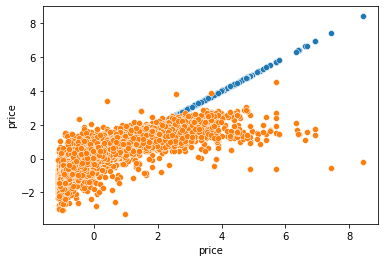

In [ ]:
# Plotting our predictions against the actual prices. 
#
# The blue line represents the values if our model had 100% accuracy. The orange
# values plot the actual prices along the x-axis, and the predictions along the
# y-axis.

sns.scatterplot(data=df_test,x='price', y='price')
sns.scatterplot(data=df_test,x='price', y='price_pred')

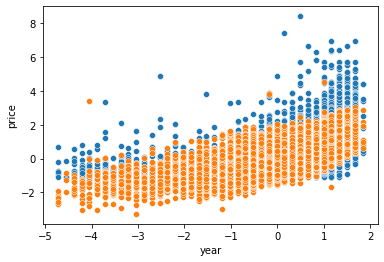

In [ ]:
sns.scatterplot(data=df_test,x='year', y='price')
sns.scatterplot(data=df_test,x='year', y='price_pred')

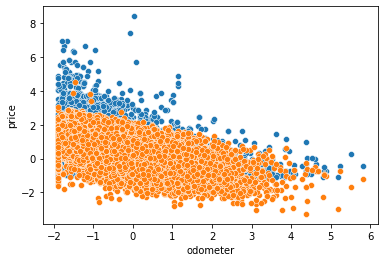

In [ ]:
sns.scatterplot(data=df_test,x='odometer', y='price')
sns.scatterplot(data=df_test,x='odometer', y='price_pred')

## <font color='lightblue'>5. Interpret your model</font>

**Q5**: Interpret your model results. E.g., what features contributed to your predictions, if possible, can you determine the sign and magnitude of the effect (Marks: 2).

In [ ]:
# Below is the summary for our linear regression.
#
# There are some interesting observations to be made here. Some of the most
# important variables seem to be the manufacturer of the vehicle. For example,
# luxury car brands like 'Aston-Martin' and 'Ferrari' have large positive
# coefficients. (3.1 and 4.4 respectively).
#
# The condition value didnt turn out to be as important as I had thought it would
# it would be, as it had a low positive coeefficent: 0.1. This might be skewed by
# the high 'salvage' values we saw earlier.
#
# Electric cars seem to be priced lower compared to gas vehicles (-1.7). This might
# be becuase there arent too many electic vehicles on the market.
#
# The variables with high correlation values in our heatmap from earlier have a
# noticable presence here too. Year contributes positively (0.4), and the mileage
# contributes negatively (-0.3).

print(linear_reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2419.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:11:48   Log-Likelihood:                -64189.
No. Observations:               77404   AIC:                         1.285e+05
Df Residuals:                   77331   BIC:                         1.292e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## <font color='lightblue'>6. Answer your question</font>

**Q6:** Use your analysis above to answer your question of interest. Did you achieve your desired outcome, and what might the next steps be? Remember to write as though you are writing to team mates working on the same/similar problem. (Marks: 3)


Note: It is ok if your analysis doesn't provide a strong answer, you can point out where it failed. If anything you can cross the approach you took off the list of possible ways to tackle your question. I.e., you still made progress!

In [ ]:
# Q6
#
# Unfortunately for our team, I don't think this model performs well enough to
# provide us with good re-sell values for our vehicles. It appears to consistently
# under-value vehicles, so if we followed its predictions we would be selling at
# a lower than market value.
#
# I think this has to do with the complexity relating to the depreciation of a
# cars value. Vehicles tend to depreciate very quickly, and not on a linear scale.
# This is why our model works better on cheaper vehicles, but struggles with more
# expensive ones.
#
# Perhaps using a more complex model would be able to fit this non-linear scaling
# we see with our vehicle prices.